<a href="https://colab.research.google.com/github/Shayantan1012/PV-Forcast-Project/blob/main/Updated_PV_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytorch-lightning
!pip install pytorch_forecasting


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 823.1/823.1 kB 17.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 32.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [87]:
import warnings
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor,ModelCheckpoint
from lightning.pytorch.loggers import TensorBoardLogger
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

import seaborn as sns
import matplotlib.pyplot as plt

# import tensorflow as tf
# import tensorboard as tb
# tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

dataset=pd.read_csv('/content/drive/MyDrive/XAI /Other data/PVGen-1.csv')
dataset=pd.DataFrame(dataset)
print(dataset.head())

               Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  01-01-2017 00:00                 0  0.0   1.6      1021       100   
1  01-01-2017 00:15                 0  0.0   1.6      1021       100   
2  01-01-2017 00:30                 0  0.0   1.6      1021       100   
3  01-01-2017 00:45                 0  0.0   1.6      1021       100   
4  01-01-2017 01:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                     0.0            

In [5]:
print(dataset.isna().sum())
print(dataset.columns)
print(len(dataset.columns))

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64
Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')
17


In [6]:
print(dataset.tail())

                    Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
196771  31-08-2022 16:45               118  23.7  18.6      1023        57   
196772  31-08-2022 17:00                82  15.6  18.5      1023        61   
196773  31-08-2022 17:15                51   8.0  18.5      1023        61   
196774  31-08-2022 17:30                24   2.1  18.5      1023        61   
196775  31-08-2022 17:45                 0   0.0  18.5      1023        61   

        wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  \
196771         3.8      0.0      0.0          52      1           780   
196772         4.2      0.0      0.0          60      1           795   
196773         4.2      0.0      0.0          60      1           810   
196774         4.2      0.0      0.0          60      1           825   
196775         4.2      0.0      0.0          60      0             0   

        dayLength  SunlightTime/daylength  weather_type  hour  month  
196771        825    

In [7]:
print(dataset.columns)
dataset['Time']

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')


0         01-01-2017 00:00
1         01-01-2017 00:15
2         01-01-2017 00:30
3         01-01-2017 00:45
4         01-01-2017 01:00
                ...       
196771    31-08-2022 16:45
196772    31-08-2022 17:00
196773    31-08-2022 17:15
196774    31-08-2022 17:30
196775    31-08-2022 17:45
Name: Time, Length: 196776, dtype: object

<ipython-input-8-f7cebfe2ad8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Energy delta[MWh]']=filtered_data['Energy delta[Wh]']*1e-6


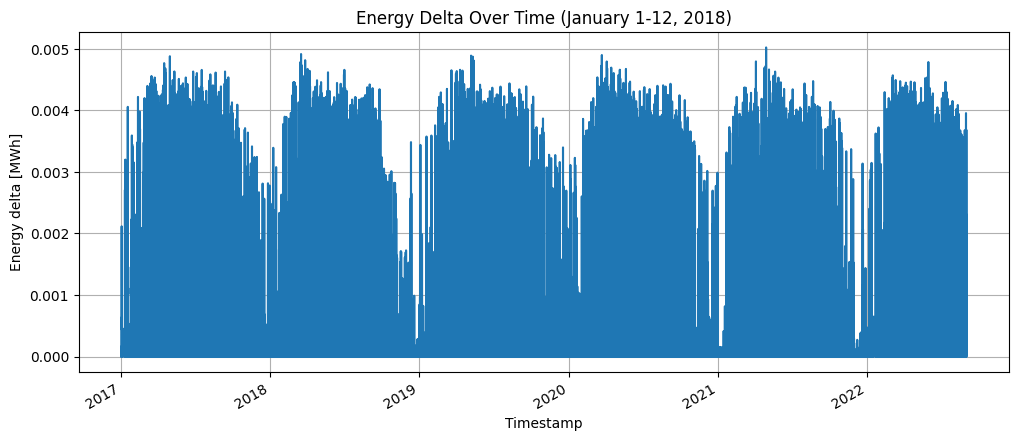

In [8]:
import matplotlib.pyplot as plt
start_time='2017-01-01'
end_time='2022-12-31'
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%d-%m-%Y %H:%M')  # Adjust format to match your data
dataset.set_index('Time', inplace=True)
dataset = dataset[((dataset.index >= start_time) & (dataset.index <= end_time))]
filtered_data = dataset[start_time:end_time]  # Use YYYY-MM-DD format for slicing
filtered_data['Energy delta[MWh]']=filtered_data['Energy delta[Wh]']*1e-6

filtered_data['Energy delta[MWh]'].plot(figsize=(12, 5), title="Energy Delta Over Time (January 1-12, 2018)")
plt.xlabel("Timestamp")
plt.ylabel("Energy delta [MWh]")
plt.grid(True)
plt.show()



In [9]:
dataset.columns

Index(['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed',
       'rain_1h', 'snow_1h', 'clouds_all', 'isSun', 'sunlightTime',
       'dayLength', 'SunlightTime/daylength', 'weather_type', 'hour', 'month'],
      dtype='object')

In [10]:
Y=filtered_data['Energy delta[MWh]']
X=filtered_data.drop(columns=['Energy delta[MWh]','Energy delta[Wh]'],axis=1)


print("X Head->",X.head)
print("X Tail->",X.tail)


X Head-> <bound method NDFrame.head of                       GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Time                                                                       
2017-01-01 00:00:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:15:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:30:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:45:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 01:00:00   0.0   1.7      1020       100         5.2      0.0   
...                   ...   ...       ...       ...         ...      ...   
2022-08-31 16:45:00  23.7  18.6      1023        57         3.8      0.0   
2022-08-31 17:00:00  15.6  18.5      1023        61         4.2      0.0   
2022-08-31 17:15:00   8.0  18.5      1023        61         4.2      0.0   
2022-08-31 17:30:00   2.1  18.5      1023        61         4.2      0.0   
2022-08-31 17:45:00   0.0  18.5      1023        

In [11]:
print(dataset.index)
print(type(dataset.index))

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:15:00',
               '2017-01-01 00:30:00', '2017-01-01 00:45:00',
               '2017-01-01 01:00:00', '2017-01-01 01:15:00',
               '2017-01-01 01:30:00', '2017-01-01 01:45:00',
               '2017-01-01 02:00:00', '2017-01-01 02:15:00',
               ...
               '2022-08-31 15:30:00', '2022-08-31 15:45:00',
               '2022-08-31 16:00:00', '2022-08-31 16:15:00',
               '2022-08-31 16:30:00', '2022-08-31 16:45:00',
               '2022-08-31 17:00:00', '2022-08-31 17:15:00',
               '2022-08-31 17:30:00', '2022-08-31 17:45:00'],
              dtype='datetime64[ns]', name='Time', length=196776, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [12]:
CorrelationMatrix=X.corr()
CorrelationMatrix

GHI      temp  pressure  humidity  wind_speed  \
GHI                     1.000000  0.492732  0.096392 -0.602186    0.017227   
temp                    0.492732  1.000000 -0.066909 -0.517358   -0.080258   
pressure                0.096392 -0.066909  1.000000 -0.120481   -0.313964   
humidity               -0.602186 -0.517358 -0.120481  1.000000   -0.112949   
wind_speed              0.017227 -0.080258 -0.313964 -0.112949    1.000000   
rain_1h                -0.048570  0.073826 -0.201842  0.126620    0.123506   
snow_1h                -0.051811 -0.123244 -0.135485  0.095623    0.072749   
clouds_all             -0.188765 -0.117245 -0.263852  0.285336    0.146116   
isSun                   0.600326  0.345600  0.014872 -0.389144    0.082700   
sunlightTime            0.540151  0.504449  0.006731 -0.598166    0.054580   
dayLength               0.401115  0.706510  0.053127 -0.416460   -0.210064   
SunlightTime/daylength  0.471907  0.382672  0.001791 -0.527887    0.092661   
weather_type           -0.163616 -0.088711 -0.319925  0.286863    0.193744   
hour                   -0.083727  0.104091 -0.002519 -0.194924   -0.003593   
month                  -0.039461  0.250656 -0.061383  0.117468   -0.045010   

                         rain_1h   snow_1h  clouds_all     isSun  \
GHI                    -0.048570 -0.051811   -0.188765  0.600326   
temp                    0.073826 -0.123244   -0.117245  0.345600   
pressure               -0.201842 -0.135485   -0.263852  0.014872   
humidity                0.126620  0.095623    0.285336 -0.389144   
wind_speed              0.123506  0.072749    0.146116  0.082700   
rain_1h                 1.000000 -0.024276    0.173332  0.045241   
snow_1h                -0.024276  1.000000    0.088428 -0.023257   
clouds_all              0.173332  0.088428    1.000000 -0.002928   
isSun                   0.045241 -0.023257   -0.002928  1.000000   
sunlightTime            0.059318 -0.038293   -0.030415  0.742715   
dayLength               0.048428 -0.109050   -0.234957  0.270923   
SunlightTime/daylength  0.050164 -0.021457    0.004761  0.774424   
weather_type            0.330671  0.143205    0.910932  0.024333   
hour                    0.011388 -0.004609   -0.019384 -0.150529   
month                   0.022221 -0.080668    0.066102 -0.024573   

                        sunlightTime  dayLength  SunlightTime/daylength  \
GHI                         0.540151   0.401115                0.471907   
temp                        0.504449   0.706510                0.382672   
pressure                    0.006731   0.053127                0.001791   
humidity                   -0.598166  -0.416460               -0.527887   
wind_speed                  0.054580  -0.210064                0.092661   
rain_1h                     0.059318   0.048428                0.050164   
snow_1h                    -0.038293  -0.109050               -0.021457   
clouds_all                 -0.030415  -0.234957                0.004761   
isSun                       0.742715   0.270923                0.774424   
sunlightTime                1.000000   0.368712                0.957972   
dayLength                   0.368712   1.000000                0.205698   
SunlightTime/daylength      0.957972   0.205698                1.000000   
weather_type                0.006140  -0.194644                0.034283   
hour                        0.144919  -0.000062                0.136889   
month                      -0.028355  -0.090981               -0.018653   

                        weather_type      hour     month  
GHI                        -0.163616 -0.083727 -0.039461  
temp                       -0.088711  0.104091  0.250656  
pressure                   -0.319925 -0.002519 -0.061383  
humidity                    0.286863 -0.194924  0.117468  
wind_speed                  0.193744 -0.003593 -0.045010  
rain_1h                     0.330671  0.011388  0.022221  
snow_1h                     0.143205 -0.004609 -0.080668  
clouds_all        

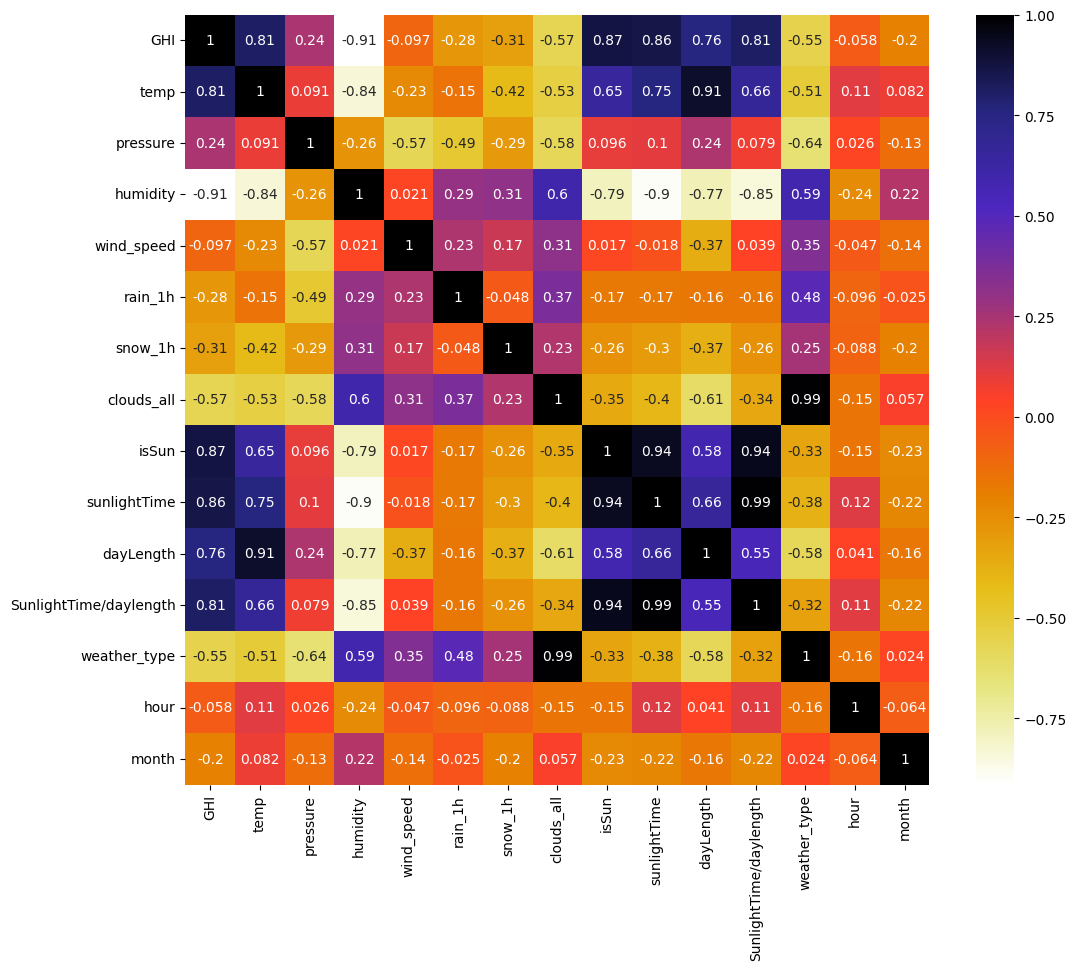

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = CorrelationMatrix.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [15]:
correlation=correlation(X,0.9)
print(correlation)
X=X.drop(correlation,axis=1)
X

{'weather_type', 'SunlightTime/daylength'}


GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Time                                                                       
2017-01-01 00:00:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:15:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:30:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:45:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 01:00:00   0.0   1.7      1020       100         5.2      0.0   
...                   ...   ...       ...       ...         ...      ...   
2022-08-31 16:45:00  23.7  18.6      1023        57         3.8      0.0   
2022-08-31 17:00:00  15.6  18.5      1023        61         4.2      0.0   
2022-08-31 17:15:00   8.0  18.5      1023        61         4.2      0.0   
2022-08-31 17:30:00   2.1  18.5      1023        61         4.2      0.0   
2022-08-31 17:45:00   0.0  18.5      1023        61         4.2      0.0   

                     snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
Time                                                                       
2017-01-01 00:00:00      0.0         100      0             0        450   
2017-01-01 00:15:00      0.0         100      0             0        450   
2017-01-01 00:30:00      0.0         100      0             0        450   
2017-01-01 00:45:00      0.0         100      0             0        450   
2017-01-01 01:00:00      0.0         100      0             0        450   
...                      ...         ...    ...           ...        ...   
2022-08-31 16:45:00      0.0          52      1           780        825   
2022-08-31 17:00:00      0.0          60      1           795        825   
2022-08-31 17:15:00      0.0          60      1           810        825   
2022-08-31 17:30:00      0.0          60      1           825        825   
2022-08-31 17:45:00      0.0          60      0             0        825   

                     hour  month  
Time                              
2017-01-01 00:00:00     0      1  
2017-01-01 00:15:00     0      1  
2017-01-01 00:30:00     0      1  
2017-01-01 00:45:00     0      1  
2017-01-01 01:00:00     1      1  
...                   ...    ...  
2022-08-31 16:45:00    16      8  
2022-08-31 17:00:00    17      8  
2022-08-31 17:15:00    17      8  
2022-08-31 17:30:00    17      8  
2022-08-31 17:45:00    17      8  

[196776 rows x 13 columns]

In [16]:
!pip install mlxtend
!pip install --upgrade scikit-learn mlxtend


In [17]:
import sklearn
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [18]:
bakward_feature_selector = SequentialFeatureSelector(LinearRegression(n_jobs=1),
                                                    k_features=8,
                                                    forward=False,
                                                    floating=False,
                                                    verbose=2,
                                                    scoring= "r2",
                                                    cv= 5).fit(X,Y)

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   15.8s finished

[2025-05-25 15:07:44] Features: 12/8 -- score: 0.8478691095841286[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   11.3s finished

[2025-05-25 15:07:55] Features: 11/8 -- score: 0.8478407488741244[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.5s finished

[2025-05-25 15:08:02] Features: 10/8 -- score: 0.847797289371746[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6s finished

[2025-05-25 15:08:05] Features: 9/8 -- score: 0.8477052092831985[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.9s finished

[2025-05-25 15:08:09] Features: 8/8 -- score: 0.8475987806046874

In [19]:
columns=bakward_feature_selector.k_feature_names_
columns


('GHI',
 'temp',
 'pressure',
 'humidity',
 'clouds_all',
 'isSun',
 'sunlightTime',
 'dayLength')

In [20]:
bakward_feature_selector.k_score_

np.float64(0.8475987806046874)

In [21]:
X = X[[col for col in X.columns if col in columns]]
X.head()

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                    
2017-01-01 00:00:00  0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00  0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00  0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00  0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00  0.0   1.7      1020       100         100      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450

In [22]:
print(dataset.head())

                     Energy delta[Wh]  GHI  temp  pressure  humidity  \
Time                                                                   
2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

                     wind_speed  rain_1h  snow_1h  clouds_all  isSun  \
Time                                                                   
2017-01-01 00:00:00         4.9      0.0      0.0         100      0   
2017-01-01 00:15:00         4.9      0.0      0.0         100      0   
2017-01-01 00:30:00         4.9      0.0      0.0         100      0   
2017-01-01 00:45:00         4.9      0.0      0.0         100      0   
2017-01-01 01:00:00         5.2      0.0      0.0         100  

In [23]:
!pip install statsmodels

# ***Temporal Fusion Transformer***

In [24]:
X_ft=dataset
X_ft['Energy delta[MWh]']=X_ft['Energy delta[Wh]']*1e-6
X_ft=X_ft.drop('Energy delta[Wh]',axis=1)
X_ft.head()

GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Time                                                                      
2017-01-01 00:00:00  0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:15:00  0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:30:00  0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:45:00  0.0   1.6      1021       100         4.9      0.0   
2017-01-01 01:00:00  0.0   1.7      1020       100         5.2      0.0   

                     snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
Time                                                                       
2017-01-01 00:00:00      0.0         100      0             0        450   
2017-01-01 00:15:00      0.0         100      0             0        450   
2017-01-01 00:30:00      0.0         100      0             0        450   
2017-01-01 00:45:00      0.0         100      0             0        450   
2017-01-01 01:00:00      0.0         100      0             0        450   

                     SunlightTime/daylength  weather_type  hour  month  \
Time                                                                     
2017-01-01 00:00:00                     0.0             4     0      1   
2017-01-01 00:15:00                     0.0             4     0      1   
2017-01-01 00:30:00                     0.0             4     0      1   
2017-01-01 00:45:00                     0.0             4     0      1   
2017-01-01 01:00:00                     0.0             4     1      1   

                     Energy delta[MWh]  
Time                                    
2017-01-01 00:00:00                0.0  
2017-01-01 00:15:00                0.0  
2017-01-01 00:30:00                0.0  
2017-01-01 00:45:00                0.0  
2017-01-01 01:00:00                0.0

In [25]:
X_ft['time_interval'] = ((X_ft.index - X_ft.index.min()).total_seconds() / 60).astype(int)
X_ft['group_id']='group'
X_ft

GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Time                                                                       
2017-01-01 00:00:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:15:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:30:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:45:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 01:00:00   0.0   1.7      1020       100         5.2      0.0   
...                   ...   ...       ...       ...         ...      ...   
2022-08-31 16:45:00  23.7  18.6      1023        57         3.8      0.0   
2022-08-31 17:00:00  15.6  18.5      1023        61         4.2      0.0   
2022-08-31 17:15:00   8.0  18.5      1023        61         4.2      0.0   
2022-08-31 17:30:00   2.1  18.5      1023        61         4.2      0.0   
2022-08-31 17:45:00   0.0  18.5      1023        61         4.2      0.0   

                     snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
Time                                                                       
2017-01-01 00:00:00      0.0         100      0             0        450   
2017-01-01 00:15:00      0.0         100      0             0        450   
2017-01-01 00:30:00      0.0         100      0             0        450   
2017-01-01 00:45:00      0.0         100      0             0        450   
2017-01-01 01:00:00      0.0         100      0             0        450   
...                      ...         ...    ...           ...        ...   
2022-08-31 16:45:00      0.0          52      1           780        825   
2022-08-31 17:00:00      0.0          60      1           795        825   
2022-08-31 17:15:00      0.0          60      1           810        825   
2022-08-31 17:30:00      0.0          60      1           825        825   
2022-08-31 17:45:00      0.0          60      0             0        825   

                     SunlightTime/daylength  weather_type  hour  month  \
Time                                                                     
2017-01-01 00:00:00                    0.00             4     0      1   
2017-01-01 00:15:00                    0.00             4     0      1   
2017-01-01 00:30:00                    0.00             4     0      1   
2017-01-01 00:45:00                    0.00             4     0      1   
2017-01-01 01:00:00                    0.00             4     1      1   
...                                     ...           ...   ...    ...   
2022-08-31 16:45:00                    0.95             3    16      8   
2022-08-31 17:00:00                    0.96             3    17      8   
2022-08-31 17:15:00                    0.98             3    17      8   
2022-08-31 17:30:00                    1.00             3    17      8   
2022-08-31 17:45:00                    0.00             3    17      8   

                     Energy delta[MWh]  time_interval group_id  
Time                                                            
2017-01-01 00:00:00           0.000000              0    group  
2017-01-01 00:15:00           0.000000             15    group  
2017-01-01 00:30:00           0.000000             30    group  
2017-01-01 00:45:00           0.000000             45    group  
2017-01-01 01:00:00           0.000000             60    group  
...                                ...            ...      ...  
2022-08-31 16:45:00           0.000118        2978925    group  
2022-08-31 17:00:00           0.000082        2978940    group  
2022-08-31 17:15:00           0.000051        2978955    group  
2022-08-31 17:30:00           0.000024        2978970    group  
2022-08-31 17:45:00           0.000000        2978985    group  

[196776 rows x 18 columns]

In [96]:
X_ft_train,X_ft_test=train_test_split(X_ft,test_size=0.2,shuffle=False);

In [97]:
#Hyperparameters
#batch size=64
#number heads=4, hidden sizes=160, lr=0.001, gr_clip=0.1

max_prediction_length = 24
max_encoder_length = 7*24
training_cutoff = X_ft["time_interval"].max() - max_prediction_length

training = TimeSeriesDataSet(
    X_ft_train[lambda x: x.time_interval <= training_cutoff],
    time_idx="time_interval",
    target="Energy delta[MWh]",
    group_ids=["group_id"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["group_id"],
    time_varying_known_reals=["time_interval", "month", 'hour'],
    time_varying_unknown_reals=['Energy delta[MWh]','GHI',
 'temp',
 'pressure',
 'humidity',
 'clouds_all',
 'isSun',
 'sunlightTime',
 'dayLength'],
    target_normalizer=GroupNormalizer(
        groups=["group_id"], transformation="softplus"
    ),  # we normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True
)


validation = TimeSeriesDataSet.from_dataset(training, X_ft_train, predict=True, stop_randomization=True)
testdata=TimeSeriesDataSet.from_dataset(training, X_ft_test, predict=True, stop_randomization=True)

# create dataloaders for  our model
batch_size = 64
# if you have a strong GPU, feel free to increase the number of workers
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)
testdataloader=testdata.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [88]:


checkpoint_callback = ModelCheckpoint(
    dirpath="/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV",   # üîπ Your desired directory
    filename="best_tft_model",            # üîπ Custom filename (no extension)
    monitor="val_loss",                   # üîπ Metric to monitor
    save_top_k=1,                         # üîπ Save only the best model
    mode="min"                            # üîπ "min" if lower is better (e.g., loss)
)

In [89]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=5, verbose=True, mode="min")
lr_logger = LearningRateMonitor()
logger = TensorBoardLogger("lightning_logs")

trainer = pl.Trainer(
    max_epochs=1,
    accelerator='gpu',
    devices=1,
    enable_model_summary=True,
    gradient_clip_val=0.1,
    callbacks=[lr_logger, early_stop_callback,checkpoint_callback],
    logger=logger,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.001,
    hidden_size=160,
    attention_head_size=4,
    dropout=0.1,
    hidden_continuous_size=160,
    output_size=7,  # there are 7 quantiles by default: [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [90]:
# trainer.fit(
#     tft,
#     train_dataloaders=train_dataloader,
#     val_dataloaders=val_dataloader,
# )

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV exists and is not empty.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | ModuleDict                      | 5.1 K  | train
4  | static_variable_selection          | VariableSelectionNetwork        | 313 K  | train
5  | encoder_variable_selec

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved. New best score: 0.000
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved. New best score: 0.000
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [91]:
best_model_path = checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [108]:
predection=best_tft.predict(testdataloader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [109]:
predection

tensor([[2.7689e-25, 2.2002e-25, 1.8699e-25, 1.6707e-25, 1.5479e-25, 1.4703e-25,
         1.4200e-25, 1.3861e-25, 1.3623e-25, 1.3446e-25, 1.3306e-25, 1.3189e-25,
         1.3086e-25, 1.2991e-25, 1.2901e-25, 1.2814e-25, 1.2730e-25, 1.2647e-25,
         1.2566e-25, 1.2486e-25, 1.2408e-25, 1.2331e-25, 1.2255e-25, 1.2181e-25]],
       device='cuda:0')

# **GRU MODEL**

In [29]:
X_G=X
Y_G=Y
print(X.shape)
st_time='2018-01-01'
X_G

(196776, 8)


GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2017-01-01 00:00:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00   0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00   0.0   1.7      1020       100         100      0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 16:45:00  23.7  18.6      1023        57          52      1   
2022-08-31 17:00:00  15.6  18.5      1023        61          60      1   
2022-08-31 17:15:00   8.0  18.5      1023        61          60      1   
2022-08-31 17:30:00   2.1  18.5      1023        61          60      1   
2022-08-31 17:45:00   0.0  18.5      1023        61          60      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450  
...                           ...        ...  
2022-08-31 16:45:00           780        825  
2022-08-31 17:00:00           795        825  
2022-08-31 17:15:00           810        825  
2022-08-31 17:30:00           825        825  
2022-08-31 17:45:00             0        825  

[196776 rows x 8 columns]

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
X_G

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2017-01-01 00:00:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00   0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00   0.0   1.7      1020       100         100      0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 16:45:00  23.7  18.6      1023        57          52      1   
2022-08-31 17:00:00  15.6  18.5      1023        61          60      1   
2022-08-31 17:15:00   8.0  18.5      1023        61          60      1   
2022-08-31 17:30:00   2.1  18.5      1023        61          60      1   
2022-08-31 17:45:00   0.0  18.5      1023        61          60      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450  
...                           ...        ...  
2022-08-31 16:45:00           780        825  
2022-08-31 17:00:00           795        825  
2022-08-31 17:15:00           810        825  
2022-08-31 17:30:00           825        825  
2022-08-31 17:45:00             0        825  

[196776 rows x 8 columns]

In [32]:
#normalizing the data
scaler = MinMaxScaler()
# Convert Series to DataFrame
Y_G = Y_G.to_frame()
X_G=pd.concat([X_G,Y_G],axis=1)

scaled_values = scaler.fit_transform(X_G)
scaled_values.shape


(196776, 9)

In [33]:
X_G
features_col=X_G.columns
print(features_col)

Index(['GHI', 'temp', 'pressure', 'humidity', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'Energy delta[MWh]'],
      dtype='object')


In [34]:
Y_G

Energy delta[MWh]
Time                                  
2017-01-01 00:00:00           0.000000
2017-01-01 00:15:00           0.000000
2017-01-01 00:30:00           0.000000
2017-01-01 00:45:00           0.000000
2017-01-01 01:00:00           0.000000
...                                ...
2022-08-31 16:45:00           0.000118
2022-08-31 17:00:00           0.000082
2022-08-31 17:15:00           0.000051
2022-08-31 17:30:00           0.000024
2022-08-31 17:45:00           0.000000

[196776 rows x 1 columns]

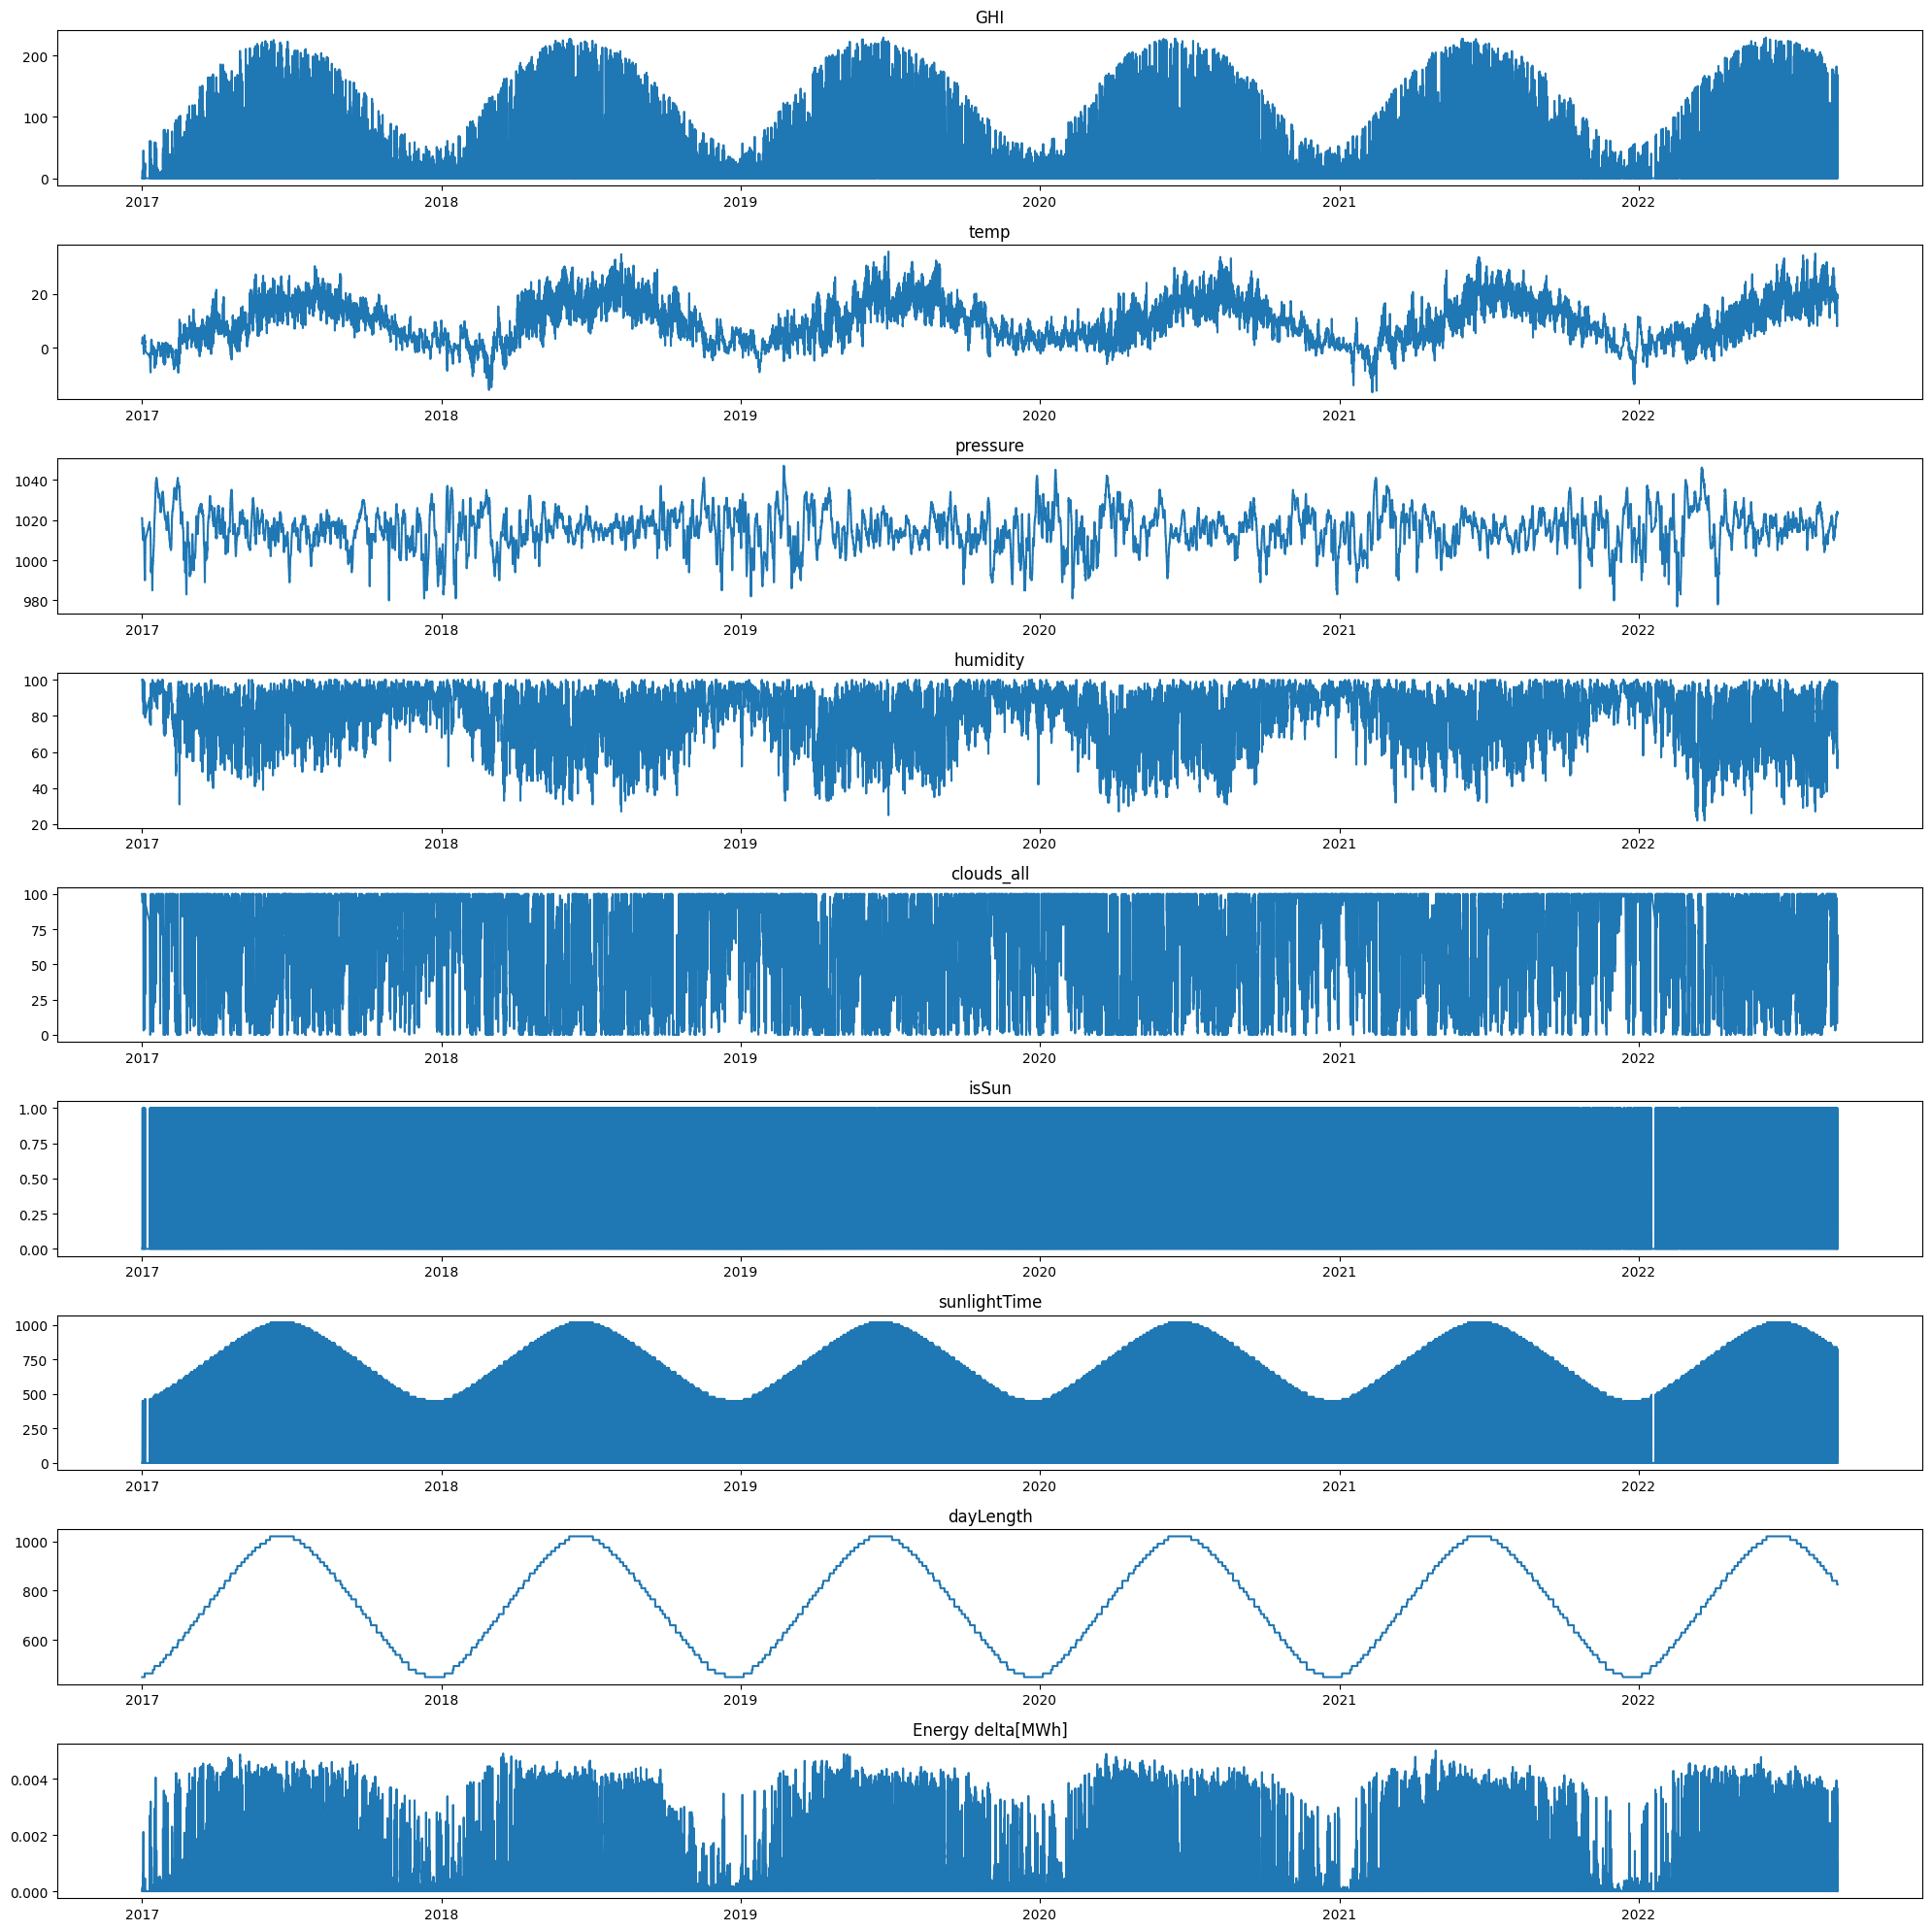

In [35]:
figure, axes = plt.subplots(len(X_G.columns),1,figsize=(20, 20))
start_time = pd.to_datetime('2018-01-01')
end_time = pd.to_datetime('2018-12-31')

for ax,col in zip(axes,X_G.columns):
    ax.plot(X_G[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(True)


plt.tight_layout()
plt.show()


In [36]:
import numpy as np

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        # Use numpy slicing instead of iloc
        X.append(data[i-window_size:i])  # Use array slicing
        y.append(data[i])  # Target value for this sequence
    return np.array(X), np.array(y)

X_G_scaled, Y_G_scaled = create_sequence(scaled_values, 60)

# Print the first sequence and corresponding target



In [37]:
X_G_scaled.shape

(196716, 60, 9)

In [38]:
X_G_scaled.shape[1], X_G_scaled.shape[2]

(60, 9)

In [39]:
Y_G_scaled.shape

(196716, 9)

In [40]:
from sklearn.model_selection import train_test_split

X_train_G, X_test_G, y_train_G, y_test_G = train_test_split(X_G_scaled, Y_G_scaled, test_size = 0.2, random_state=42,shuffle=False)
X_train_G.shape, y_train_G.shape, X_test_G.shape, y_test_G.shape

((157372, 60, 9), (157372, 9), (39344, 60, 9), (39344, 9))

In [41]:
Y_G_scaled

array([[0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03490401, 0.66984733, 0.65714286, ..., 0.79411765, 0.65789474,
        0.01015936],
       [0.0091623 , 0.66984733, 0.65714286, ..., 0.80882353, 0.65789474,
        0.00478088],
       [0.        , 0.66984733, 0.65714286, ..., 0.        , 0.65789474,
        0.        ]])

In [42]:
X_test_G.size

21245760

In [43]:

y_test_G=scaler.inverse_transform(y_test_G)


In [44]:
y_test_G

array([[0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       [0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       [0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       ...,
       [8.000e+00, 1.850e+01, 1.023e+03, ..., 8.100e+02, 8.250e+02,
        5.100e-05],
       [2.100e+00, 1.850e+01, 1.023e+03, ..., 8.250e+02, 8.250e+02,
        2.400e-05],
       [0.000e+00, 1.850e+01, 1.023e+03, ..., 0.000e+00, 8.250e+02,
        0.000e+00]])

In [45]:
X_test_G.shape

(39344, 60, 9)

In [46]:
X_train_G.shape

(157372, 60, 9)

In [47]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [48]:
class TabulerDataset(Dataset):
  def __init__(self ,X,y):
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

In [49]:
loader=TabulerDataset(X_train_G,y_train_G)

dataloader=DataLoader(loader,batch_size=60,shuffle=False);

In [50]:
len(dataloader)

2623

In [51]:

iterator = iter(dataloader)
X_batch, y_batch = next(iterator)

print(X_batch.shape)
print(y_batch.shape)

torch.Size([60, 60, 9])
torch.Size([60, 9])


In [52]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [53]:
class GRUblock(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers):
    super(GRUblock,self).__init__()
    self.hidden_size=hidden_size
    self.num_layers=num_layers
    self.input_size=input_size
    self.gru1=nn.GRU(input_size, hidden_size, num_layers=1)
    self.gru2=nn.GRU(hidden_size, hidden_size, num_layers=1)
    self.fc=nn.Linear(hidden_size,9)
  def forward(self,x):
    h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)


    h1=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)


    x=x.to(device)
    out,(h1)=self.gru1(x,(h0))
    out,(h1)=self.gru2(out,(h1))
    out=self.fc(out[: ,-1 , :])
    return out



In [54]:
X_train_G.shape

(157372, 60, 9)

In [55]:
gru=GRUblock(X_train_G.shape[2],64,1).to(device)
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(gru.parameters(),lr=0.001)

In [56]:
def train_gru(model,dataloader,loss_fn,optimizer,device,epochs):
  for epochs in range(epochs):
    total_loss=0
    for i,(X_batch,y_batch) in enumerate(dataloader):
      if(i==len(dataloader)-1):
        break
      X_batch=X_batch.to(device)
      y_batch=y_batch.to(device)

      y_pred=model(X_batch)

      loss=loss_fn(y_pred,y_batch)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total_loss+=loss
    avg_loss=total_loss/len(dataloader)
    print(f'The avg loss in EPOCH:{epochs} is {avg_loss}')



In [57]:
# train_gru(gru,dataloader,loss_fn,optimizer,device,30)

In [58]:
# torch.save(gru.state_dict(),'/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/gru_model.pt')

In [59]:
model_gru=GRUblock(X_train_G.shape[2],64,1).to(device)
model_gru.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/gru_model.pt'))
model_gru.eval()

GRUblock(
  (gru1): GRU(9, 64)
  (gru2): GRU(64, 64)
  (fc): Linear(in_features=64, out_features=9, bias=True)
)

In [60]:
X_test_G.shape

(39344, 60, 9)

In [61]:
y_test_G.shape

(39344, 9)

In [62]:
test_loader=TabulerDataset(X_test_G,y_test_G)
test_loader=DataLoader(test_loader,batch_size=60,shuffle=False)


In [63]:
len(test_loader)

656

In [64]:
gru.eval()
cou=0
predicted=[]
with torch.no_grad():
    for i, (X_batch, y_batch) in enumerate(test_loader):
        if i == (len(test_loader) - 1):
          continue
        X_batch = X_batch.to(device)
        yPred = model_gru(X_batch)
        predicted.append(yPred.cpu().numpy())




In [65]:

predicted=np.array(predicted)

In [66]:
predicted.shape

(655, 60, 9)

In [67]:
predicted=predicted.reshape(-1,9)
predicted.shape

(39300, 9)

In [68]:
yPredDF = pd.DataFrame(predicted)
y_pred_inv_df_gru =yPredDF
y_pred_inv_df_gru.columns=X_G.columns




In [69]:
y_pred_inv_df_gru=scaler.inverse_transform(y_pred_inv_df_gru)

In [70]:
y_pred_inv_df_gru=pd.DataFrame(y_pred_inv_df_gru)
y_pred_inv_df_gru.columns=X_G.columns

In [71]:
y_pred_inv_df_gru.shape

(39300, 9)

In [72]:
y_test_G.shape

(39344, 9)

In [73]:
# Trim index so its length becomes exactly 39300
trimmed_index = X_G.index[-len(y_test_G):][:-44]

# Now assign this to prediction DataFrame
y_pred_inv_df_gru.index = trimmed_index

In [74]:
y_pred_inv_df_gru

GHI       temp     pressure   humidity  \
Time                                                                 
2021-07-04 22:00:00   -2.531039  17.433132  1008.740845  93.086700   
2021-07-04 22:15:00   -0.885710  18.069864  1010.775757  87.551750   
2021-07-04 22:30:00   -2.432981  18.707075  1010.636658  87.427368   
2021-07-04 22:45:00    1.883324  18.195126  1009.531189  87.403725   
2021-07-04 23:00:00   -1.099274  17.931314  1010.268311  88.644707   
...                         ...        ...          ...        ...   
2022-08-31 05:45:00   60.823421  11.292732  1025.808350  96.514046   
2022-08-31 06:00:00   70.318108  12.157183  1025.826294  94.238411   
2022-08-31 06:15:00   83.357193  17.028275  1026.141113  90.850136   
2022-08-31 06:30:00   91.270355  16.754530  1025.788940  91.157204   
2022-08-31 06:45:00  104.925606  16.955082  1025.828369  92.550613   

                     clouds_all     isSun  sunlightTime    dayLength  \
Time                                                                   
2021-07-04 22:00:00   22.756308 -0.052526    -51.429100  1024.696289   
2021-07-04 22:15:00   56.421059 -0.061752      4.740033  1023.320740   
2021-07-04 22:30:00   55.808483 -0.013558    -11.081832  1026.335449   
2021-07-04 22:45:00   56.110233 -0.005570     12.047102  1025.713623   
2021-07-04 23:00:00   59.968712  0.023701     -1.872053  1023.800537   
...                         ...       ...           ...          ...   
2022-08-31 05:45:00   24.273338  1.020967    159.293900   871.149536   
2022-08-31 06:00:00   25.473476  1.019101    176.786392   872.253235   
2022-08-31 06:15:00   21.302048  1.015464    188.043106   869.080505   
2022-08-31 06:30:00   21.127237  1.021504    202.199768   869.048340   
2022-08-31 06:45:00   22.249142  1.009490    218.749222   871.703979   

                     Energy delta[MWh]  
Time                                    
2021-07-04 22:00:00           0.000094  
2021-07-04 22:15:00          -0.000014  
2021-07-04 22:30:00          -0.000017  
2021-07-04 22:45:00           0.000102  
2021-07-04 23:00:00           0.000064  
...                                ...  
2022-08-31 05:45:00           0.000251  
2022-08-31 06:00:00           0.000267  
2022-08-31 06:15:00           0.000358  
2022-08-31 06:30:00           0.000596  
2022-08-31 06:45:00           0.000907  

[39300 rows x 9 columns]

In [75]:
y_test_G=pd.DataFrame(y_test_G)
y_test_G.columns=X_G.columns
y_test_G=y_test_G[:-44]
y_test_G.index=trimmed_index
y_test_G

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2021-07-04 22:00:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:15:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:30:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:45:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 23:00:00   0.0  17.3    1010.0      93.0        42.0    0.0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 05:45:00  54.9   8.1    1024.0      96.0        19.0    1.0   
2022-08-31 06:00:00  64.9  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:15:00  74.8  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:30:00  84.5  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:45:00  94.1  14.6    1024.0      90.0        15.0    1.0   

                     sunlightTime  dayLength  Energy delta[MWh]  
Time                                                             
2021-07-04 22:00:00           0.0     1020.0           0.000000  
2021-07-04 22:15:00           0.0     1020.0           0.000000  
2021-07-04 22:30:00           0.0     1020.0           0.000000  
2021-07-04 22:45:00           0.0     1020.0           0.000000  
2021-07-04 23:00:00           0.0     1020.0           0.000000  
...                           ...        ...                ...  
2022-08-31 05:45:00         120.0      825.0           0.000162  
2022-08-31 06:00:00         135.0      825.0           0.000181  
2022-08-31 06:15:00         150.0      825.0           0.000377  
2022-08-31 06:30:00         165.0      825.0           0.000634  
2022-08-31 06:45:00         180.0      825.0           0.001040  

[39300 rows x 9 columns]

In [76]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


MSE:7.741666560855318e-08
MAE:0.00014905739159080163
RMSE:0.0002782385048992198


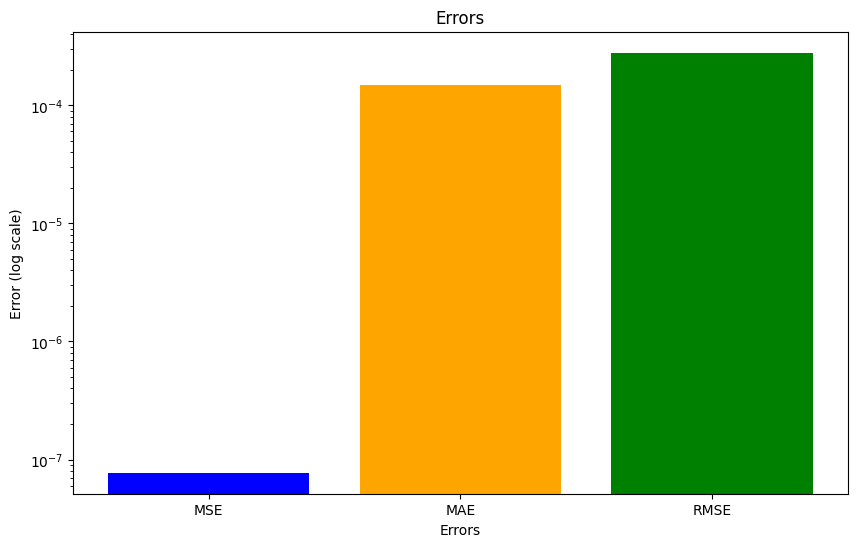

In [77]:
mse_g=mean_squared_error(y_test_G['Energy delta[MWh]'],y_pred_inv_df_gru['Energy delta[MWh]']);
mae_g=mean_absolute_error(y_test_G['Energy delta[MWh]'],y_pred_inv_df_gru['Energy delta[MWh]']);
rmse_g=root_mean_squared_error(y_test_G['Energy delta[MWh]'],y_pred_inv_df_gru['Energy delta[MWh]']);
print(f'MSE:{mse_g}\nMAE:{mae_g}\nRMSE:{rmse_g}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_g , 'MAE' : mae_g ,'RMSE' : rmse_g }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


In [78]:
fig ,axes=plt.subplots(len(y_pred_inv_df_gru.columns),1,figsize=(20,20))
for ax,col in zip(axes,y_pred_inv_df_gru.columns):
    ax.plot(y_test_G[col],color='red',label=f'Actual {col}')
    ax.plot(y_pred_inv_df_gru[col],color='blue',label=f'Predicted {col}')
    ax.legend()
    ax.set_title(col)
    ax.set_title(col)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

# **LSTM MODEL**

In [ ]:
X_L=X
Y_L=Y
print(X.shape)
st_time='2018-01-01'
X_L

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_L

In [ ]:
#normalizing the data
scaler = MinMaxScaler()
# Convert Series to DataFrame
Y_L = Y_L.to_frame()
X_L=pd.concat([X_L,Y_L],axis=1)

scaled_values = scaler.fit_transform(X_L)
scaled_values.shape


In [ ]:
X_L
features_col=X_L.columns
print(features_col)

In [ ]:
Y_L

In [ ]:
figure, axes = plt.subplots(len(X_L.columns),1,figsize=(20, 20))
start_time = pd.to_datetime('2018-01-01')
end_time = pd.to_datetime('2018-12-31')

for ax,col in zip(axes,X_L.columns):
    ax.plot(X_L[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(True)


plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        # Use numpy slicing instead of iloc
        X.append(data[i-window_size:i])  # Use array slicing
        y.append(data[i])  # Target value for this sequence
    return np.array(X), np.array(y)

X_L_scaled, Y_L_scaled = create_sequence(scaled_values, 60)

# Print the first sequence and corresponding target



In [ ]:
X_L_scaled.shape

In [ ]:
X_L_scaled.shape[1], X_L_scaled.shape[2]

In [ ]:
Y_L_scaled.shape

In [ ]:
#train-test-split

X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L_scaled, Y_L_scaled, test_size = 0.2, random_state=42,shuffle=False)
X_train_L.shape, y_train_L.shape, X_test_L.shape, y_test_L.shape

In [ ]:
Y_L_scaled

In [ ]:
X_test_L.size

In [ ]:

y_test_L=scaler.inverse_transform(y_test_L)


In [ ]:
y_test_L

In [ ]:
X_test_L.shape

In [ ]:
X_train_L.shape

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
class TabulerDataset(Dataset):
  def __init__(self ,X,y):
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

In [ ]:
loader=TabulerDataset(X_train_L,y_train_L)

dataloader=DataLoader(loader,batch_size=60,shuffle=False);

In [ ]:
len(dataloader)

In [ ]:

iterator = iter(dataloader)
X_batch, y_batch = next(iterator)

print(X_batch.shape)
print(y_batch.shape)

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

In [ ]:
class LSTMblock(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers):
    super(LSTMblock,self).__init__()
    self.hidden_size=hidden_size
    self.num_layers=num_layers
    self.input_size=input_size
    self.lstm1=nn.LSTM(input_size, hidden_size, num_layers=1)
    self.lstm2=nn.LSTM(hidden_size, hidden_size, num_layers=1)
    self.fc=nn.Linear(hidden_size,9)
  def forward(self,x):
    h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
    c0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)

    h1=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
    c1=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)

    x=x.to(device)
    out,(h1,c1)=self.lstm1(x,(h0,c0))
    out,(h1,c1)=self.lstm2(out,(h1,c1))
    out=self.fc(out[: ,-1 , :])
    return out



In [ ]:
X_train_L.shape

In [ ]:
lstm=LSTMblock(X_train_L.shape[2],64,1).to(device)
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(lstm.parameters(),lr=0.001)


In [ ]:
def train_lstm(model,dataloader,loss_fn,optimizer,device,epochs):
  for epochs in range(epochs):
    total_loss=0
    for i,(X_batch,y_batch) in enumerate(dataloader):
      if(i==len(dataloader)-1):
        break
      X_batch=X_batch.to(device)
      y_batch=y_batch.to(device)

      y_pred=model(X_batch)

      loss=loss_fn(y_pred,y_batch)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total_loss+=loss
    avg_loss=total_loss/len(dataloader)
    print(f'The avg loss in EPOCH:{epochs} is {avg_loss}')



In [ ]:
# train_lstm(lstm,dataloader,loss_fn,optimizer,device,30)

In [ ]:
# torch.save(lstm.state_dict(),'/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/lstm_model')

In [ ]:
model_lstm=LSTMblock(X_train_L.shape[2],64,1).to(device)
model_lstm.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/lstm_model'))
model_lstm.eval()

In [ ]:
X_test_L.shape

In [ ]:
y_test_L.shape

In [ ]:
test_loader=TabulerDataset(X_test_L,y_test_L)
test_loader=DataLoader(test_loader,batch_size=60,shuffle=False)


In [ ]:
len(test_loader)

In [ ]:
lstm.eval()
cou=0
predicted=[]
with torch.no_grad():
    for i, (X_batch, y_batch) in enumerate(test_loader):
        if i == (len(test_loader) - 1):
          continue
        X_batch = X_batch.to(device)
        yPred = model_lstm(X_batch)
        predicted.append(yPred.cpu().numpy())




In [ ]:

predicted=np.array(predicted)

In [ ]:
predicted.shape

In [ ]:
predicted=predicted.reshape(-1,9)
predicted.shape

In [ ]:
yPredDF = pd.DataFrame(predicted)
y_pred_inv_df =yPredDF
y_pred_inv_df.columns=X_L.columns




In [ ]:
y_pred_inv_df=scaler.inverse_transform(y_pred_inv_df)

In [ ]:
y_pred_inv_df=pd.DataFrame(y_pred_inv_df)
y_pred_inv_df.columns=X_L.columns

In [ ]:
y_pred_inv_df.shape

In [ ]:
y_test_L.shape

In [ ]:
# Trim index so its length becomes exactly 39300
trimmed_index = X_L.index[-len(y_test_L):][:-44]

# Now assign this to prediction DataFrame
y_pred_inv_df.index = trimmed_index

In [ ]:
y_pred_inv_df

In [ ]:
y_test_L=pd.DataFrame(y_test_L)
y_test_L.columns=X_L.columns
y_test_L=y_test_L[:-44]
y_test_L.index=trimmed_index
y_test_L

In [ ]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


In [ ]:
mse_l=mean_squared_error(y_test_L['Energy delta[MWh]'],y_pred_inv_df['Energy delta[MWh]']);
mae_l=mean_absolute_error(y_test_L['Energy delta[MWh]'],y_pred_inv_df['Energy delta[MWh]']);
rmse_l=root_mean_squared_error(y_test_L['Energy delta[MWh]'],y_pred_inv_df['Energy delta[MWh]']);
print(f'MSE:{mse_l}\nMAE:{mae_l}\nRMSE:{rmse_l}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_l , 'MAE' : mae_l ,'RMSE' : rmse_l }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


In [ ]:
fig ,axes=plt.subplots(len(y_pred_inv_df.columns),1,figsize=(20,20))
for ax,col in zip(axes,y_pred_inv_df.columns):
    ax.plot(y_test_L[col],color='red',label=f'Actual {col}')
    ax.plot(y_pred_inv_df[col],color='blue',label=f'Predicted {col}')
    ax.legend()
    ax.set_title(col)
    ax.set_title(col)

plt.tight_layout()
plt.show()


# **TRANSFORMER MODEL**

In [ ]:
X_T=X
Y_T=Y
print(X.shape)
st_time='2018-01-01'
X_T

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_T

In [ ]:
#normalizing the data
scaler = MinMaxScaler()
# Convert Series to DataFrame
Y_T = Y_T.to_frame()
X_T=pd.concat([X_T,Y_T],axis=1)

scaled_values = scaler.fit_transform(X_T)
scaled_values.shape


In [ ]:
X_T
features_col=X_T.columns
print(features_col)

In [ ]:
Y_T

In [ ]:
figure, axes = plt.subplots(len(X_T.columns),1,figsize=(20, 20))
start_time = pd.to_datetime('2018-01-01')
end_time = pd.to_datetime('2018-12-31')

for ax,col in zip(axes,X_T.columns):
    ax.plot(X_T[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(True)


plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        # Use numpy slicing instead of iloc
        X.append(data[i-window_size:i])  # Use array slicing
        y.append(data[i])  # Target value for this sequence
    return np.array(X), np.array(y)

X_T_scaled, Y_T_scaled = create_sequence(scaled_values, 60)

# Print the first sequence and corresponding target



In [ ]:
X_T_scaled.shape

In [ ]:
X_T_scaled.shape[1], X_T_scaled.shape[2]

In [ ]:
Y_T_scaled.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X_L_scaled, Y_L_scaled, test_size = 0.2, random_state=42,shuffle=False)
X_train_T.shape, y_train_T.shape, X_test_T.shape, y_test_T.shape

In [ ]:
Y_T_scaled

In [ ]:
X_test_T.size

In [ ]:

y_test_T=scaler.inverse_transform(y_test_T)


In [ ]:
y_test_T

In [ ]:
X_test_T.shape

In [ ]:
X_train_T.shape

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
class TabulerDataset(Dataset):
  def __init__(self ,X,y):
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

In [ ]:
loader=TabulerDataset(X_train_T,y_train_T)

dataloader=DataLoader(loader,batch_size=60,shuffle=False);

In [ ]:
len(dataloader)

In [ ]:

iterator = iter(dataloader)
X_batch, y_batch = next(iterator)

print(X_batch.shape)
print(y_batch.shape)

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

In [ ]:
# Model definition using Transformer
class TransformerModel(nn.Module):
    def __init__(self, input_dim=9, d_model=60, nhead=4, num_layers=2, dropout=0.2):
        super(TransformerModel, self).__init__()

        self.encoder = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(d_model, 9)

    def forward(self, x):
        x = self.encoder(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.decoder(x[:, -1, :])
        return x

transformer = TransformerModel().to(device)

In [ ]:
X_train_T.shape

In [ ]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(transformer.parameters(),lr=0.001)

In [ ]:
def train_transformer(model,dataloader,loss_fn,optimizer,device,epochs):
  for epochs in range(epochs):
    total_loss=0
    for i,(X_batch,y_batch) in enumerate(dataloader):
      if(i==len(dataloader)-1):
        break
      X_batch=X_batch.to(device)
      y_batch=y_batch.to(device)

      y_pred=model(X_batch)

      loss=loss_fn(y_pred,y_batch)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total_loss+=loss
    avg_loss=total_loss/len(dataloader)
    print(f'The avg loss in EPOCH:{epochs} is {avg_loss}')



In [ ]:
# train_transformer(transformer,dataloader,loss_fn,optimizer,device,30)

In [ ]:
# torch.save(transformer.state_dict(),'/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/transformer_model.pt')

In [ ]:
model_transformer=TransformerModel().to(device)
model_transformer.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/transformer_model.pt'))
model_transformer.eval()

In [ ]:
X_test_T.shape

In [ ]:
y_test_T.shape

In [ ]:
test_loader=TabulerDataset(X_test_T,y_test_T)
test_loader=DataLoader(test_loader,batch_size=60,shuffle=False)


In [ ]:
len(test_loader)

In [ ]:
transformer.eval()
cou=0
predicted=[]
with torch.no_grad():
    for i, (X_batch, y_batch) in enumerate(test_loader):
        if i == (len(test_loader) - 1):
          continue
        X_batch = X_batch.to(device)
        yPred = model_transformer(X_batch)
        predicted.append(yPred.cpu().numpy())




In [ ]:

predicted=np.array(predicted)

In [ ]:
predicted.shape

In [ ]:
predicted=predicted.reshape(-1,9)
predicted.shape

In [ ]:
yPredDF = pd.DataFrame(predicted)
y_pred_inv_df_t =yPredDF
y_pred_inv_df_t.columns=X_T.columns




In [ ]:
y_pred_inv_df_t=scaler.inverse_transform(y_pred_inv_df_t)

In [ ]:
y_pred_inv_df_t=pd.DataFrame(y_pred_inv_df_t)
y_pred_inv_df_t.columns=X_T.columns

In [ ]:
y_pred_inv_df_t.shape

In [ ]:
y_test_T.shape

In [ ]:
# Trim index so its length becomes exactly 39300
trimmed_index = X_T.index[-len(y_test_T):][:-44]

# Now assign this to prediction DataFrame
y_pred_inv_df_t.index = trimmed_index

In [ ]:
y_pred_inv_df_t

In [ ]:
y_test_T=pd.DataFrame(y_test_T)
y_test_T.columns=X_T.columns
y_test_T=y_test_T[:-44]
y_test_T.index=trimmed_index
y_test_T

In [ ]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


In [ ]:
mse_t=mean_squared_error(y_test_T['Energy delta[MWh]'],y_pred_inv_df_t['Energy delta[MWh]']);
mae_t=mean_absolute_error(y_test_T['Energy delta[MWh]'],y_pred_inv_df_t['Energy delta[MWh]']);
rmse_t=root_mean_squared_error(y_test_T['Energy delta[MWh]'],y_pred_inv_df_t['Energy delta[MWh]']);
print(f'MSE:{mse_t}\nMAE:{mae_t}\nRMSE:{rmse_t}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_t , 'MAE' : mae_t ,'RMSE' : rmse_t }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


In [ ]:
fig ,axes=plt.subplots(len(y_pred_inv_df_t.columns),1,figsize=(20,20))
for ax,col in zip(axes,y_pred_inv_df_t.columns):
    ax.plot(y_test_T[col],color='red',label=f'Actual {col}')
    ax.plot(y_pred_inv_df_t[col],color='blue',label=f'Predicted {col}')
    ax.legend()
    ax.set_title(col)
    ax.set_title(col)

plt.tight_layout()
plt.show()


# ***ERROR COMPARISION***


In [ ]:
plt.figure(figsize=(12, 7))
error_com_mse={'LSTM':mse_l , 'GRU':mse_g , 'TRANSFORMER':mse_t}
plt.bar(error_com_mse.keys(),error_com_mse.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
error_com_mae={'LSTM':mae_l , 'GRU':mae_g , 'TRANSFORMER':mae_t}
plt.bar(error_com_mae.keys(),error_com_mae.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
error_com_rmse={'LSTM':rmse_l , 'GRU':rmse_g , 'TRANSFORMER':rmse_t}
plt.bar(error_com_rmse.keys(),error_com_rmse.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

# NOW CREATE A DATASET FOR ENSEMBLE ***MODEL***

In [ ]:
PredG=y_pred_inv_df_gru
PredL=y_pred_inv_df
PredT=y_pred_inv_df_t


In [ ]:
Y=Y.to_frame()
Y

In [ ]:
# Step 1: Convert all variables into DataFrames with column names
y_train_G = pd.DataFrame(PredG['Energy delta[MWh]'])
y_train_L = pd.DataFrame(PredL['Energy delta[MWh]'])
y_train_T = pd.DataFrame(PredT['Energy delta[MWh]'])
y_train_R = pd.DataFrame(Y['Energy delta[MWh]'])

# Step 2: Concatenate the DataFrames along columns
y_train_combined = pd.concat([y_train_G, y_train_L, y_train_T, y_train_R], axis=1)
y_train_combined.columns = ['GRU', 'LSTM', 'Transformer', 'Actual Value']


In [ ]:
y_train_combined.dropna(inplace=True)

In [ ]:
y_train_combined

In [ ]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(12, 7))

# Plot model predictions and actual values
plt.plot(y_train_combined['GRU'], color='blue', linestyle='-', label='GRU')
plt.plot(y_train_combined['LSTM'], color='green', linestyle='--', label='LSTM')
plt.plot(y_train_combined['Transformer'], color='black', linestyle='-.', label='TRANSFORMER')
plt.plot(y_train_combined['Actual Value'], color='red', linestyle='-', label='Actual Value')

# Titles and labels
plt.title("Model Predictions vs Actual Values", fontsize=16, fontweight='bold')
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Energy delta [MWh]", fontsize=12)

# Grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend box
plt.legend(loc='upper right', fontsize=12, frameon=True, edgecolor='black', fancybox=True, shadow=True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))

plt.plot(y_train_combined['GRU'], color='blue', linestyle='-', label='GRU')
plt.plot(y_train_combined['LSTM'], color='green', linestyle='--', label='LSTM')
plt.plot(y_train_combined['Transformer'], color='black', linestyle='-.', label='TRANSFORMER')
plt.plot(y_train_combined['Actual Value'], color='red', linestyle='-', linewidth=1, label='Actual Value')
plt.title("Model Predictions vs Actual Values", fontsize=16, fontweight='bold')
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Energy delta [MWh]", fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



# ***NOW BEGIN WITH  ENSEMBLE MODEL***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(y_train_combined.drop('Actual Value',axis=1),y_train_combined['Actual Value'], test_size = 0.1, random_state=42,shuffle=False)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
X_test

# ***MLP***

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        return self.model(x)




In [ ]:
# Training function
def train_model(model, X_train, y_train, epochs=10, batch_size=10, learning_rate=0.001):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
     # ‚úÖ Convert to NumPy first if input is DataFrame/Series
    if hasattr(X_train, 'values'):
        X_train = X_train.values
    if hasattr(y_train, 'values'):
        y_train = y_train.values

    # Convert data to tensors and move to device
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        total_mae = 0.0

        for i in range(0, len(X_train_tensor), batch_size):
            x_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]

            # Forward pass
            outputs = model(x_batch)

            loss = criterion(outputs, y_batch)

            mae = torch.mean(torch.abs(outputs - y_batch))

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_mae += mae.item()

        avg_loss = total_loss / len(X_train_tensor)
        avg_mae = total_mae / len(X_train_tensor)
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.8f} - MAE: {avg_mae:.8f}")

    return model

In [ ]:
model_mlp = MLPModel()
# trained_model = train_model(model_mlp, X_train, y_train, epochs=50, batch_size=10)

In [ ]:
# Save model weights
# torch.save(model_mlp.state_dict(), '/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/mlp_model.pt')

In [ ]:
model_mlp=MLPModel().to(device)
model_mlp.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/mlp_model.pt'))
model_mlp.eval()

In [ ]:
model_mlp_res=model_mlp(torch.tensor(X_test.values).to(device))


In [ ]:
model_mlp_res=model_mlp_res.cpu().detach().numpy()

In [ ]:
MLPdf = pd.DataFrame(model_mlp_res, columns=["MLP Output"])

In [ ]:
MLPdf.index=X_test.index
MLPdf

In [ ]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


In [ ]:
mse_m=mean_squared_error(y_test_T['Energy delta[MWh]'],MLPdf['MLP Output']);
mae_m=mean_absolute_error(y_test_T['Energy delta[MWh]'],MLPdf['MLP Output']);
rmse_m=root_mean_squared_error(y_test_T['Energy delta[MWh]'],MLPdf['MLP Output']);
print(f'MSE:{mse_m}\nMAE:{mae_m}\nRMSE:{rmse_m}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_m , 'MAE' : mae_m ,'RMSE' : rmse_m }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


# ***CNN MODEL***

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class CNN_model(nn.Module):
  def __init__(self):
    super(CNN_model,self).__init__()
    self.conv1=nn.Conv1d(out_channels=128,kernel_size=2,in_channels=1)
    self.pool=nn.MaxPool1d(kernel_size=2)
    self.flatten=nn.Flatten()
    self.fc1=nn.Linear(in_features=128,out_features=64)
    self.fc2=nn.Linear(in_features=64,out_features=1)

  def forward(self,x):
    x=self.conv1(x)
    x=self.pool(x)
    x=self.flatten(x)
    x=self.fc1(x)
    x=self.fc2(x)
    return x


In [ ]:
def train_cnn_model(model, X_train, y_train, epochs=10, batch_size=1, learning_rate=0.001):
    model = model.to(device)
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Ensure data is NumPy array first
    if hasattr(X_train, 'values'):
        X_train = X_train.values
    if hasattr(y_train, 'values'):
        y_train = y_train.values

    # Convert to torch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 3).to(device)  # (batch_size, 1, 3)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)     # (batch_size, 1)

    history = {'loss': [], 'mae': []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        total_mae = 0.0

        for i in range(0, len(X_train_tensor), batch_size):
            x_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(x_batch)

            loss = loss_fn(outputs, y_batch)
            mae = torch.mean(torch.abs(outputs - y_batch))

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_mae += mae.item()

        avg_loss = total_loss / len(X_train_tensor)
        avg_mae = total_mae / len(X_train_tensor)

        history['loss'].append(avg_loss)
        history['mae'].append(avg_mae)

        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.8f} - MAE: {avg_mae:.8f}")

    return model, history


In [ ]:
model_cnn = CNN_model().to(device)
# trained_model_cnn, history = train_cnn_model(model_cnn, X_train, y_train, epochs=80, batch_size=10)


In [ ]:
# Save model weights
# torch.save(model_cnn.state_dict(), '/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/cnn_model.pt')

In [ ]:
model_cnn=CNN_model().to(device)
model_cnn.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/cnn_model.pt'))
model_cnn.eval()

In [ ]:
X_train

In [ ]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).view(-1, 1, 3).to(device)  # (batch_size, 1, 3)
model_cnn_res=model_cnn(X_test_tensor).cpu().detach().numpy()

In [ ]:
model_cnn_ = model_cnn_res.reshape(-1, 1)
CNNdf = pd.DataFrame(model_cnn_, columns=["CNN Output"])

In [ ]:
CNNdf.index=X_test.index
CNNdf

In [ ]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


In [ ]:
mse_c=mean_squared_error(y_test_T['Energy delta[MWh]'],CNNdf['CNN Output']);
mae_c=mean_absolute_error(y_test_T['Energy delta[MWh]'],CNNdf['CNN Output']);
rmse_c=root_mean_squared_error(y_test_T['Energy delta[MWh]'],CNNdf['CNN Output']);
print(f'MSE:{mse_c}\nMAE:{mae_c}\nRMSE:{rmse_c}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_c , 'MAE' : mae_c ,'RMSE' : rmse_c }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


# ***ATTENTION MECHANISM***#

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
    # Ensure data is NumPy array first

if hasattr(X_train,'values'):
  X_train=X_train.values
if hasattr(y_train,'values'):
  y_train=y_train.values

seqlength=20
X_train_seq=[]
y_train_seq=[]

for i in range(len(X_train)-seqlength):
  X_train_seq.append(X_train[i:i+seqlength])
  y_train_seq.append(y_train[i+seqlength])

X_train_seq=torch.tensor(X_train_seq,dtype=torch.float32).to(device)
y_train_seq=torch.tensor(y_train_seq,dtype=torch.float32).to(device)

dataset=TensorDataset(X_train_seq,y_train_seq)

dataloader=DataLoader(dataset,batch_size=20,shuffle=False)

In [ ]:
import torch
import torch.nn as nn

class MultiHeadAttentionModel(nn.Module):
    def __init__(self, input_dim=3, embeded_dim=36, num_head=6, seq_len=20):
        super(MultiHeadAttentionModel, self).__init__()  # FIXED: missing dot here

        self.seq_len = seq_len
        self.embeded_dim = embeded_dim
        self.num_head = num_head
        self.input_dim = input_dim

        self.embedding = nn.Linear(input_dim, embeded_dim)
        self.position_embedding = nn.Parameter(torch.rand(1, seq_len, embeded_dim))  # Learnable positional embedding

        self.attn = nn.MultiheadAttention(embed_dim=embeded_dim, num_heads=num_head, batch_first=True)

        self.fc = nn.Sequential(
            nn.Linear(embeded_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # You are predicting a single value (e.g., one regression target)
        )

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_dim)
        x = self.embedding(x) + self.position_embedding  # Add positional encoding
        attn_output, _ = self.attn(x, x, x)  # Apply multi-head self-attention
        last_token = attn_output[:, -1, :]  # Use the output of the last time step
        out = self.fc(last_token)  # Feedforward network for final output
        return out


In [ ]:
import matplotlib.pyplot as plt  # FIXED: typo in import

def train_loop_attention(model, dataloader, optimizer, epochs, criterion):
    loss_per_epochs = []

    model.train()  # Set the model to training mode

    for epoch in range(epochs):
        avg_loss = 0.0
        total_batches = 0

        for xb, yb in dataloader:
            pred = model(xb).to(device)
            loss = criterion(pred.squeeze(), yb)  # Use .squeeze() if needed to match yb's shape

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            avg_loss += loss.item()  # Use .item() to get a float
            total_batches += 1

        avg_loss /= total_batches  # Average over batches
        loss_per_epochs.append(avg_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.10f}")

    # Plot the loss
    plt.plot(loss_per_epochs)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.grid(True)
    plt.show()

In [ ]:
model_attention=MultiHeadAttentionModel().to(device)
optimizer=torch.optim.Adam(model_attention.parameters(),lr=0.001)
epochs=50
criterion=nn.MSELoss()

In [ ]:
# train_loop_attention(model_attention,dataloader,optimizer,epochs,criterion)

In [ ]:
# torch.save(model_attention.state_dict(),'/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/attention_model.pt')

In [ ]:
model_attention=MultiHeadAttentionModel().to(device)
model_attention.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/attention_model.pt'))
model_attention.eval()

In [ ]:
X_test

In [ ]:
X_test.values.shape

In [ ]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).view(-1, 1, 3).to(device)  # (batch_size, 1, 3)
model_attention_res=model_attention(X_test_tensor).cpu().detach().numpy()

In [ ]:
model_attention_ = model_attention_res.reshape(-1, 1)
model_attention_df = pd.DataFrame(model_attention_, columns=["Attention Output"])

In [ ]:
model_attention_df.index=X_test.index
model_attention_df

In [ ]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


In [ ]:
mse_a=mean_squared_error(y_test_T['Energy delta[MWh]'],model_attention_df['Attention Output']);
mae_a=mean_absolute_error(y_test_T['Energy delta[MWh]'],model_attention_df['Attention Output']);
rmse_a=root_mean_squared_error(y_test_T['Energy delta[MWh]'],model_attention_df['Attention Output']);
print(f'MSE:{mse_a}\nMAE:{mae_a}\nRMSE:{rmse_a}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_a , 'MAE' : mae_a ,'RMSE' : rmse_a }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


# ***SIMPLE MEAN***

In [ ]:
X_test['Simple Mean'] = X_test.mean(axis=1)


In [ ]:
SimpleMean=X_test['Simple Mean']
SimpleMean

In [ ]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


In [ ]:
mse_s=mean_squared_error(y_test_T['Energy delta[MWh]'],X_test['Simple Mean']);
mae_s=mean_absolute_error(y_test_T['Energy delta[MWh]'],X_test['Simple Mean']);
rmse_s=root_mean_squared_error(y_test_T['Energy delta[MWh]'],X_test['Simple Mean']);
print(f'MSE:{mse_s}\nMAE:{mae_s}\nRMSE:{rmse_s}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_s , 'MAE' : mae_s ,'RMSE' : rmse_s }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


# ***ERROR COMPARISION***

In [ ]:
plt.figure(figsize=(12, 7))

error_com_mae={'MLP':mae_m , 'CNN':mae_c , 'Simple Mean':mae_s , 'Attention':mae_a}
plt.bar(error_com_mae.keys(),error_com_mae.values() , color=['blue', 'orange', 'green','pink']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
error_com_mse={'MLP':mse_m , 'CNN':mse_c , 'Simple Mean':mse_s ,'Attention':mse_a}
plt.bar(error_com_mse.keys(),error_com_mse.values() , color=['blue', 'orange', 'green' , 'pink']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
error_com_rmse={'MLP':rmse_m , 'CNN':rmse_c , 'Simple Mean':rmse_s ,'Attention':rmse_a}
plt.bar(error_com_rmse.keys(),error_com_rmse.values() , color=['blue', 'orange', 'green','pink']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

In [ ]:
ActualData=y_test
ActualData=pd.DataFrame(ActualData)
ActualData.index=X_test.index
ActualData.columns=['Actual Value']
ActualData

In [ ]:
FinalDataframe=pd.concat([SimpleMean,MLPdf,CNNdf,model_attention_df,ActualData],axis=1)
FinalDataframe

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot each line with custom styles
plt.plot(FinalDataframe['Actual Value'], label='Actual Value', color='blue', linewidth=2)
plt.plot(FinalDataframe['Simple Mean'], label='Simple Mean', color='orange',  linewidth=2)
plt.plot(FinalDataframe['MLP Output'], label='MLP Output', color='green', linewidth=2)
plt.plot(FinalDataframe['CNN Output'], label='CNN Output', color='red',  linewidth=2)
plt.plot(FinalDataframe['Attention Output'], label='Attention Output', color='pink', linewidth=2)
# Add title and labels
plt.title('Comparison of Actual and Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Customize legend
plt.legend(loc='best', fontsize=12, title='Legend', title_fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [ ]:
X_test=X_test.drop('Simple Mean',axis=1)
ensemble_model_test=pd.concat([FinalDataframe,X_test],axis=1)
ensemble_model_test

In [ ]:
y_train_combined

In [ ]:
monthly_data_combined = y_train_combined


In [ ]:
monthly_data_combined

In [ ]:
monthly_data_ensemble = ensemble_model_test.resample('D').mean()
monthly_data_ensemble

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['Simple Mean'], label='Simple Mean')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['MLP Output'], label='MLP Output')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['CNN Output'], label='CNN Output')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['Actual Value'], label='Actual Value')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['GRU'], label='GRU')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['LSTM'], label='LSTM')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['Transformer'], label='TRANSFORMER')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['Attention Output'], label='Attention Output')
plt.title('Daily Comparison of Actual and Predicted Values')
plt.xlabel('Daily')
plt.ylabel('Value')
plt.legend()
plt.show()

***PREDICTED OUTPUT FROM RESEARCH PAPER***

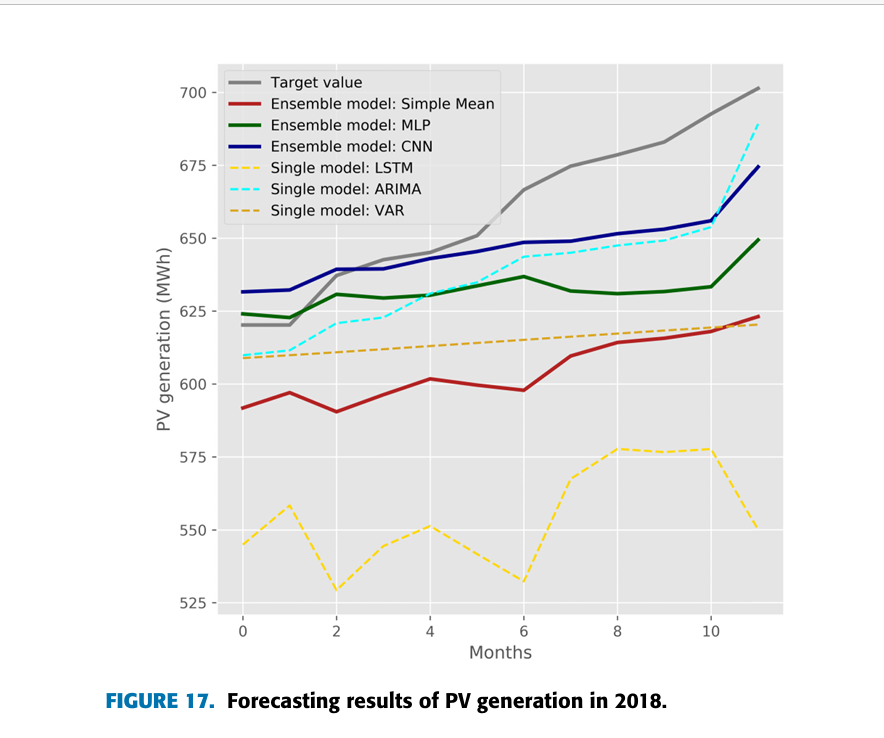